In [1]:
pip install easydl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import subprocess
import time
import numpy as np
from easydl import clear_output
import matplotlib.pyplot as plt
import math
import random
import datetime

[easydl] tensorflow not available!


## Define function to clean each cell's output

In [2]:
def clear_output():
    """
    clear output for both jupyter notebook and the console
    """
    import os
    os.system('cls' if os.name == 'nt' else 'clear')
    if is_in_notebook():
        from IPython.display import clear_output as clear
        clear()

In [3]:
from easydl import clear_output

print('before')
clear_output()  # test if the output of each cell can be cleaned
print('after')

after


## Generate historical workload and record the loads

In [20]:
try:
    open('workload_firewall.csv', 'r').close()
    print('File already present.')
except IOError:
    with open('workload_firewall.csv', 'w') as f:
        f.write('current_app_name,timestep,round,current_user,rate,duration,info\n')
    print('File not present. Created successfully!')

File not present. Created successfully!


[1, 3, 4, 6, 7, 8, 9, 10, 10, 10, 8, 9, 8, 7, 7, 5, 3, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 7, 7, 8, 7, 8, 9, 9, 7, 6, 6, 6, 5, 5, 4, 4, 6, 10, 10, 9, 7, 5, 3, 2, 2, 0]


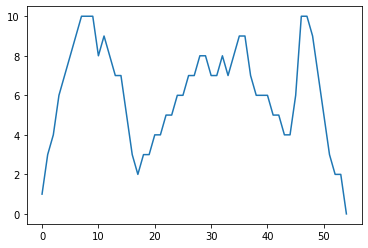

In [5]:
#generate stable workloads
workload1 = list(np.sin(np.arange(0.1,np.pi/2-0.3,0.15)))
workload2 = list(np.sin(np.arange(np.pi/2-0.3,np.pi-0.2,0.2)))
workload3 = list(np.sin(np.arange(0.2,np.pi/4-0.1,0.05)))
workload4 = list(np.sin(np.arange(np.pi/4-0.1,np.pi/4+0.1,0.25)))
workload5 = list(np.sin(np.arange(np.pi/4+0.1,np.pi/4-0.1,-0.1)))
workload6 = list(np.sin(np.arange(np.pi/4-0.1,np.pi/4+0.2,0.05)))
workload7 = list(np.sin(np.arange(np.pi/4+0.2,np.pi/4-0.1,-0.3)))
workload8 = list(np.sin(np.arange(np.pi/4-0.1,0.1,-0.05)))
workloads = workload1 + workload2 + workload3 + workload4 + workload5 + workload6 + workload7 + workload8
workloads = [math.ceil(workload * 10) for workload in workloads]
# randomly insert some 25 bursts and 1/2 small loads
count = int(len(workloads) * 0.15)
size = len(workloads)
while count:
    idx = random.randint(2, size-1)
    workloads[idx] = random.sample([25, 2, 1],1)[0]
    count -= 1
plt.plot([i for i in range(len(workloads))], workloads)
print(workloads)

In [30]:
app_name = 'firewall'
def stress_function(runtime, time_duration, max_load, num_of_rounds, workloads):
    endpoint = '145.100.135.52'
    step = 0
    for load_round in range(0, num_of_rounds):
        print('Test {} round'.format(load_round) + '\n')
        for load in workloads:
            step += 1
            rate = int(load / 3) if int(load / 3) > 0 else 1
            # Save historical tuple\
            now = datetime.datetime.now() + datetime.timedelta(hours=2)
            dt_string = now.strftime('%d/%m/%Y %H:%M:%S')
            with open('workload_firewall.csv', 'a') as f:
                f.write('{},{},{},{},{},{},{}'.format(app_name, step, load_round, load, rate, runtime, dt_string) + '\n')
            locust_process = subprocess.Popen('./locust-stress.sh {} {} {} {}'
                                              .format(endpoint, load, rate, runtime), shell=True, close_fds=True)
            time.sleep(time_duration)
            locust_process.terminate()
            locust_process.kill()
            clear_output()
    
    return 0

In [31]:
stress_function('1m', 60-1, 10, 3, workloads)

0

[2022-06-22 18:32:54,373] lz-04/INFO/locust.main: --run-time limit reached. Stopping Locust
[2022-06-22 18:32:54,375] lz-04/INFO/locust.main: Shutting down (exit code 0)
Type     Name                                                                          # reqs      # fails |    Avg     Min     Max    Med |   req/s  failures/s
--------|----------------------------------------------------------------------------|-------|-------------|-------|-------|-------|-------|--------|-----------
--------|----------------------------------------------------------------------------|-------|-------------|-------|-------|-------|-------|--------|-----------
         Aggregated                                                                         0     0(0.00%) |      0       0       0      0 |    0.00        0.00

Response time percentiles (approximated)
Type     Name                                                                                  50%    66%    75%    80%    90%    95%    98%    

here
catched error
